## Simple Example

Here we introduce the idea of creating a domain which contains the mesh and quantities needed to run the simulation, and encapsulates the methods for setting up the initial conditions, the boundary conditions and the method for evolving the solution.

### Setup Notebook for Visualisation and Animation

We are using the format of a jupyter notebook. As such we need to setup inline matplotlib plotting and animation.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

### Import ANUGA

We assume that anuga has been installed. If so we can import anuga. 

In [12]:
import anuga

### Create an ANUGA domain

A Domain is the core object which contains the mesh and the quantities for the particular problem. Here we create a simple rectangular Domain. We set the name to domain1 which will be used when storing the simulation output to a sww file called domain1.sww.

In [13]:
domain1 = anuga.rectangular_cross_domain(40, 20, len1=20.0, len2=10.0)

domain1.set_name('domain1')
domain1.set_store_vertices_smoothly(False)

### Plot Mesh

Let's look at the mesh. We will use some code derived form the clawpack project to simplify plotting and animation of the output from our simulations. This is available via the animate module loaded from anuga.

The Domain_plotter class provides a plotting wrapper around our standard anuga Domain, providing simple access to the centroid values of our evolution quantities, stage, depth, elev, xmon and ymon and the triangulation triang.

Note: This visualisation is recommended for smaller domains (maybe up to 10,000 triangles). We have an anuga-viewer for larger domains.

Figure files for each frame will be stored in _plot


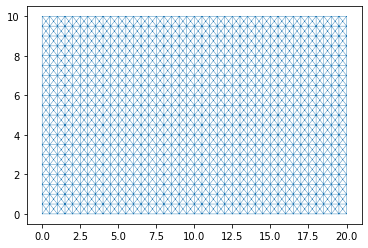

In [14]:
dplotter1 = anuga.Domain_plotter(domain1)  
plt.triplot(dplotter1.triang, linewidth = 0.4);

### Setup Initial Conditions

We have to setup the values of various quantities associated with the domain. In particular we need to setup the elevation the elevation of the bed or the bathymetry. In this case we will do this using a function.

In [6]:
def topography(x, y):

    z = -x/10

    N = len(x)
    
    minx = np.floor(np.max(x)/4)
    wallx1 = np.min(x[(x >= minx)])
    wallx2 = np.min(x[(x > wallx1 + 0.25)])
    
    minx = np.floor(np.max(x)/2)
    wallx3 = np.min(x[(x >= minx)])
    wallx4 = np.min(x[(x > wallx3 + 0.25)])
    
    minx = np.floor(3*np.max(x)/4)
    wallx5 = np.min(x[(x >= minx)])
    wallx6 = np.min(x[(x > wallx5 + 0.25)])
    
    dist = 0.4 * (np.max(y) - np.min(y))
    
    for i in range(N):
        if wallx1 <= x[i] <= wallx2:
            if (y[i] < dist):
                z[i] += 1
                
        if wallx3 <= x[i] <= wallx4:
            if (y[i] > np.max(y) - dist):
                z[i] += 1
                
        if wallx5 <= x[i] <= wallx6:
            if (y[i] < dist):
                z[i] += 1
            
    return z

### Set Quantities

Now we set the elevation, stage and friction using the domain.set_quantity function.

In [15]:
domain1.set_quantity('elevation', topography, location='centroids')         # Use function for elevation
domain1.set_quantity('friction', 0.01, location='centroids')                # Constant friction 
domain1.set_quantity('stage', expression='elevation', location='centroids') # Dry Bed 

### View Elevation

Let's use the matplotlib function tripcolor to plot the elevation quantitiy. We access the domain mesh and elevation quantitiy via the dplotter interface.

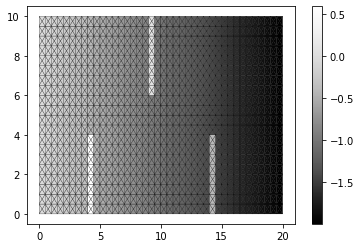

In [16]:
plt.tripcolor(dplotter1.triang, 
              facecolors = dplotter1.elev, 
              edgecolors='k', 
              cmap='Greys_r')
plt.colorbar();

### Setup Boundary Conditions

The rectangular domain has 4 tagged boundaries, left, top, right and bottom. We need to set boundary conditons for each of these tagged boundaries. We can set Dirichlet type BC with specified values of stage, and x and y "momentum". Another common BC is Reflective_boundary which mimics a wall.

In [17]:
Bi = anuga.Dirichlet_boundary([0.4, 0, 0])         # Inflow
Bo = anuga.Dirichlet_boundary([-2, 0, 0])          # Outflow
Br = anuga.Reflective_boundary(domain1)            # Solid reflective wall

domain1.set_boundary({'left': Bi, 'right': Bo, 'top': Br, 'bottom': Br})

### Run the Evolution

We evolve using a for statement, which evolves the quantities using the shallow water wave solver. The calculation yields every yieldstep seconds, for a given duration.

In [10]:
for t in domain1.evolve(yieldstep=2, duration=40):
  
    #dplotter.plot_depth_frame()
    dplotter1.save_depth_frame(vmin=0.0,vmax=1.0)
    
    domain1.print_timestepping_statistics()

    
# Read in the png files stored during the evolve loop
dplotter1.make_depth_animation() 

Time = 0.0000 (sec), steps=0 (16s)
Time = 2.0000 (sec), delta t in [0.01779464, 0.03749219] (s), steps=93 (0s)
Time = 4.0000 (sec), delta t in [0.01523410, 0.01780455] (s), steps=123 (0s)
Time = 6.0000 (sec), delta t in [0.01509139, 0.01543878] (s), steps=132 (0s)
Time = 8.0000 (sec), delta t in [0.01543945, 0.01589701] (s), steps=129 (0s)
Time = 10.0000 (sec), delta t in [0.01510457, 0.01595656] (s), steps=129 (0s)
Time = 12.0000 (sec), delta t in [0.01448747, 0.01510270] (s), steps=136 (0s)
Time = 14.0000 (sec), delta t in [0.01416889, 0.01448641] (s), steps=140 (0s)
Time = 16.0000 (sec), delta t in [0.01390842, 0.01416679] (s), steps=143 (0s)
Time = 18.0000 (sec), delta t in [0.01381293, 0.01390783] (s), steps=145 (0s)
Time = 20.0000 (sec), delta t in [0.01356459, 0.01381284] (s), steps=147 (0s)
Time = 22.0000 (sec), delta t in [0.01337491, 0.01356424] (s), steps=149 (0s)
Time = 24.0000 (sec), delta t in [0.01312175, 0.01337337] (s), steps=152 (0s)
Time = 26.0000 (sec), delta t in [